# **Project name- Cardio vascular disease prediction**

**Project type- Classification**

**Contribution- Individual**

# **Github link**

 Large number of people die due to the incidence of coronary heart diseases, which if neccessary precautions and medications are taken the mortality rate can be decreased.There are several reasons for increase in mortality rate due to coronary heart diseases which may be because either due to food consumption pattern, work presssure, lack of exercise or any other health issues such as diabetus, blood pressure and any other habits which includes smoking. Therefore, it is the need of the hour to early diagnosis of disease based on other variables or conditions. For this purpose, supervised machine learning seems to be a best solution since the data is available and different algorithms can be trained for prediction of disease based on other paramaters. In this project, different algorithms were used for prediction of disease based on other paramaters such as blood pressure, diabettus and smoking factor etc.

# **Objective**

The main objective of the project is to predict the coronary heart disease based on the set of variables using machine learning algorithms. The prediction is dichotomous in nature, yes or no.

# Import neccessary libraries

In [113]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Importing model selection libraries.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing evaluation metrics for model.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Importing machine learning models required.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

# **Loading the dataset**

In [3]:
# Copy the path of the file and import the dataset
path='/content/data_cardiovascular_risk.csv'
cardio_data=pd.read_csv(path)

# **Dataset First view**

In [4]:
# It displays the topmost 5 rows of the dataset
cardio_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# It displays random five rows of the dataset
cardio_data.sample(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
988,988,59,1.0,M,YES,43.0,0.0,0,0,0,162.0,117.0,73.0,25.01,96.0,87.0,0
1421,1421,54,2.0,F,NO,0.0,0.0,0,0,0,240.0,125.0,87.0,28.76,76.0,76.0,1
1946,1946,55,2.0,F,YES,9.0,0.0,0,0,0,289.0,141.0,83.5,24.99,76.0,76.0,0
1875,1875,47,1.0,F,YES,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1
1567,1567,42,4.0,F,NO,0.0,0.0,0,0,0,182.0,138.0,91.0,20.02,90.0,74.0,0


In [6]:
#It displays the bottom 5 rows of the dataset
cardio_data.tail(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


# **Dataset Rows and Columns count**

In [7]:
# It displays the number of rows and columns respectively
cardio_data.shape

(3390, 17)

The dataset has 3390 rows and 17 columns.

# **Information about the dataset.**

In [8]:
#Displays the information of the dataset
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

There are different types of datatypes which includes float, integer and object type.

In [9]:
# Displays the statistical information of the dataset
cardio_data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
#Displays the columns of the dataset
cardio_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

These are the columns present in the dataset.

In [11]:
# Displays the unique values of different columns
for column in cardio_data.columns:
    unique_values = cardio_data[column].unique()
    # Print the column name and its unique values
    print(f"The unique values of {column} are {unique_values}")
    print('--------------')

The unique values of id are [   0    1    2 ... 3387 3388 3389]
--------------
The unique values of age are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
--------------
The unique values of education are [ 2.  4.  1.  3. nan]
--------------
The unique values of sex are ['F' 'M']
--------------
The unique values of is_smoking are ['YES' 'NO']
--------------
The unique values of cigsPerDay are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
--------------
The unique values of BPMeds are [ 0. nan  1.]
--------------
The unique values of prevalentStroke are [0 1]
--------------
The unique values of prevalentHyp are [0 1]
--------------
The unique values of diabetes are [0 1]
--------------
The unique values of totChol are [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164.

In [12]:
#Displays the number of unique values of each variable is as follows.
cardio_data.drop(['id'],inplace=True,axis=1)
for column in cardio_data.columns:
  print(f'The number of unique values in {column} are {cardio_data[column].nunique()}')

The number of unique values in age are 39
The number of unique values in education are 4
The number of unique values in sex are 2
The number of unique values in is_smoking are 2
The number of unique values in cigsPerDay are 32
The number of unique values in BPMeds are 2
The number of unique values in prevalentStroke are 2
The number of unique values in prevalentHyp are 2
The number of unique values in diabetes are 2
The number of unique values in totChol are 240
The number of unique values in sysBP are 226
The number of unique values in diaBP are 142
The number of unique values in BMI are 1259
The number of unique values in heartRate are 68
The number of unique values in glucose are 132
The number of unique values in TenYearCHD are 2


In [13]:
# Displays the numerical and categorical variables
numerical_variables=[]
categorical_variables=[]

for column in cardio_data.columns:
  if cardio_data[column].nunique()>10:
    numerical_variables.append(column)
  else:
    categorical_variables.append(column)

print(f'The numerical variables are {numerical_variables}')
print(f'The categorical variables are {categorical_variables}')

The numerical variables are ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
The categorical variables are ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


The above ones are the numerical variables and categorical variables present in the dataset resspectively.

# **Handling missing values**

In [14]:
# Displays the missing values present in the dataset
cardio_data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

There are missing values in some variables majorly found in variable 'glucose'.

In [15]:
missing_values=cardio_data.isnull()
type(missing_values)

pandas.core.frame.DataFrame

<Axes: >

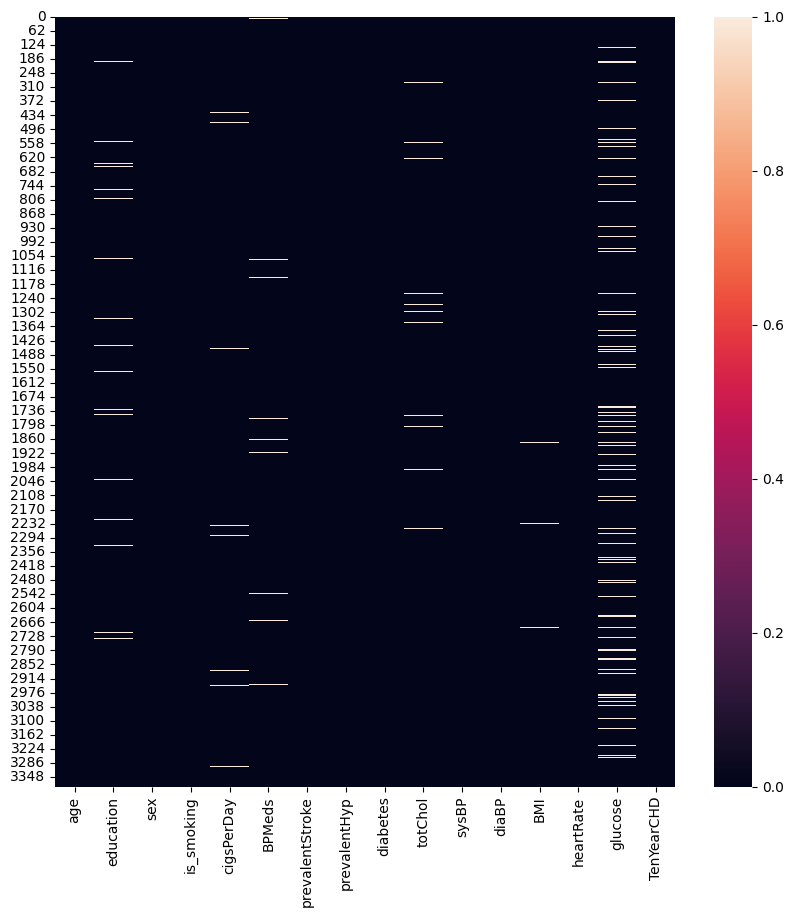

In [16]:
#heatmap for missing values
plt.figure(figsize=(10,10))
sns.heatmap(missing_values)

In [17]:
cardio_data['glucose'].fillna(cardio_data['glucose'].median(),inplace=True)

Missing values in case of variable 'glucose' are filled with its median value.

In [18]:
# Drop the missing values
cardio_data.dropna(inplace=True)

All other missing values are dropped from the dataset.

In [19]:
cardio_data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

There are no missing values in the dataset  

# **Check for the presence of Outliers**

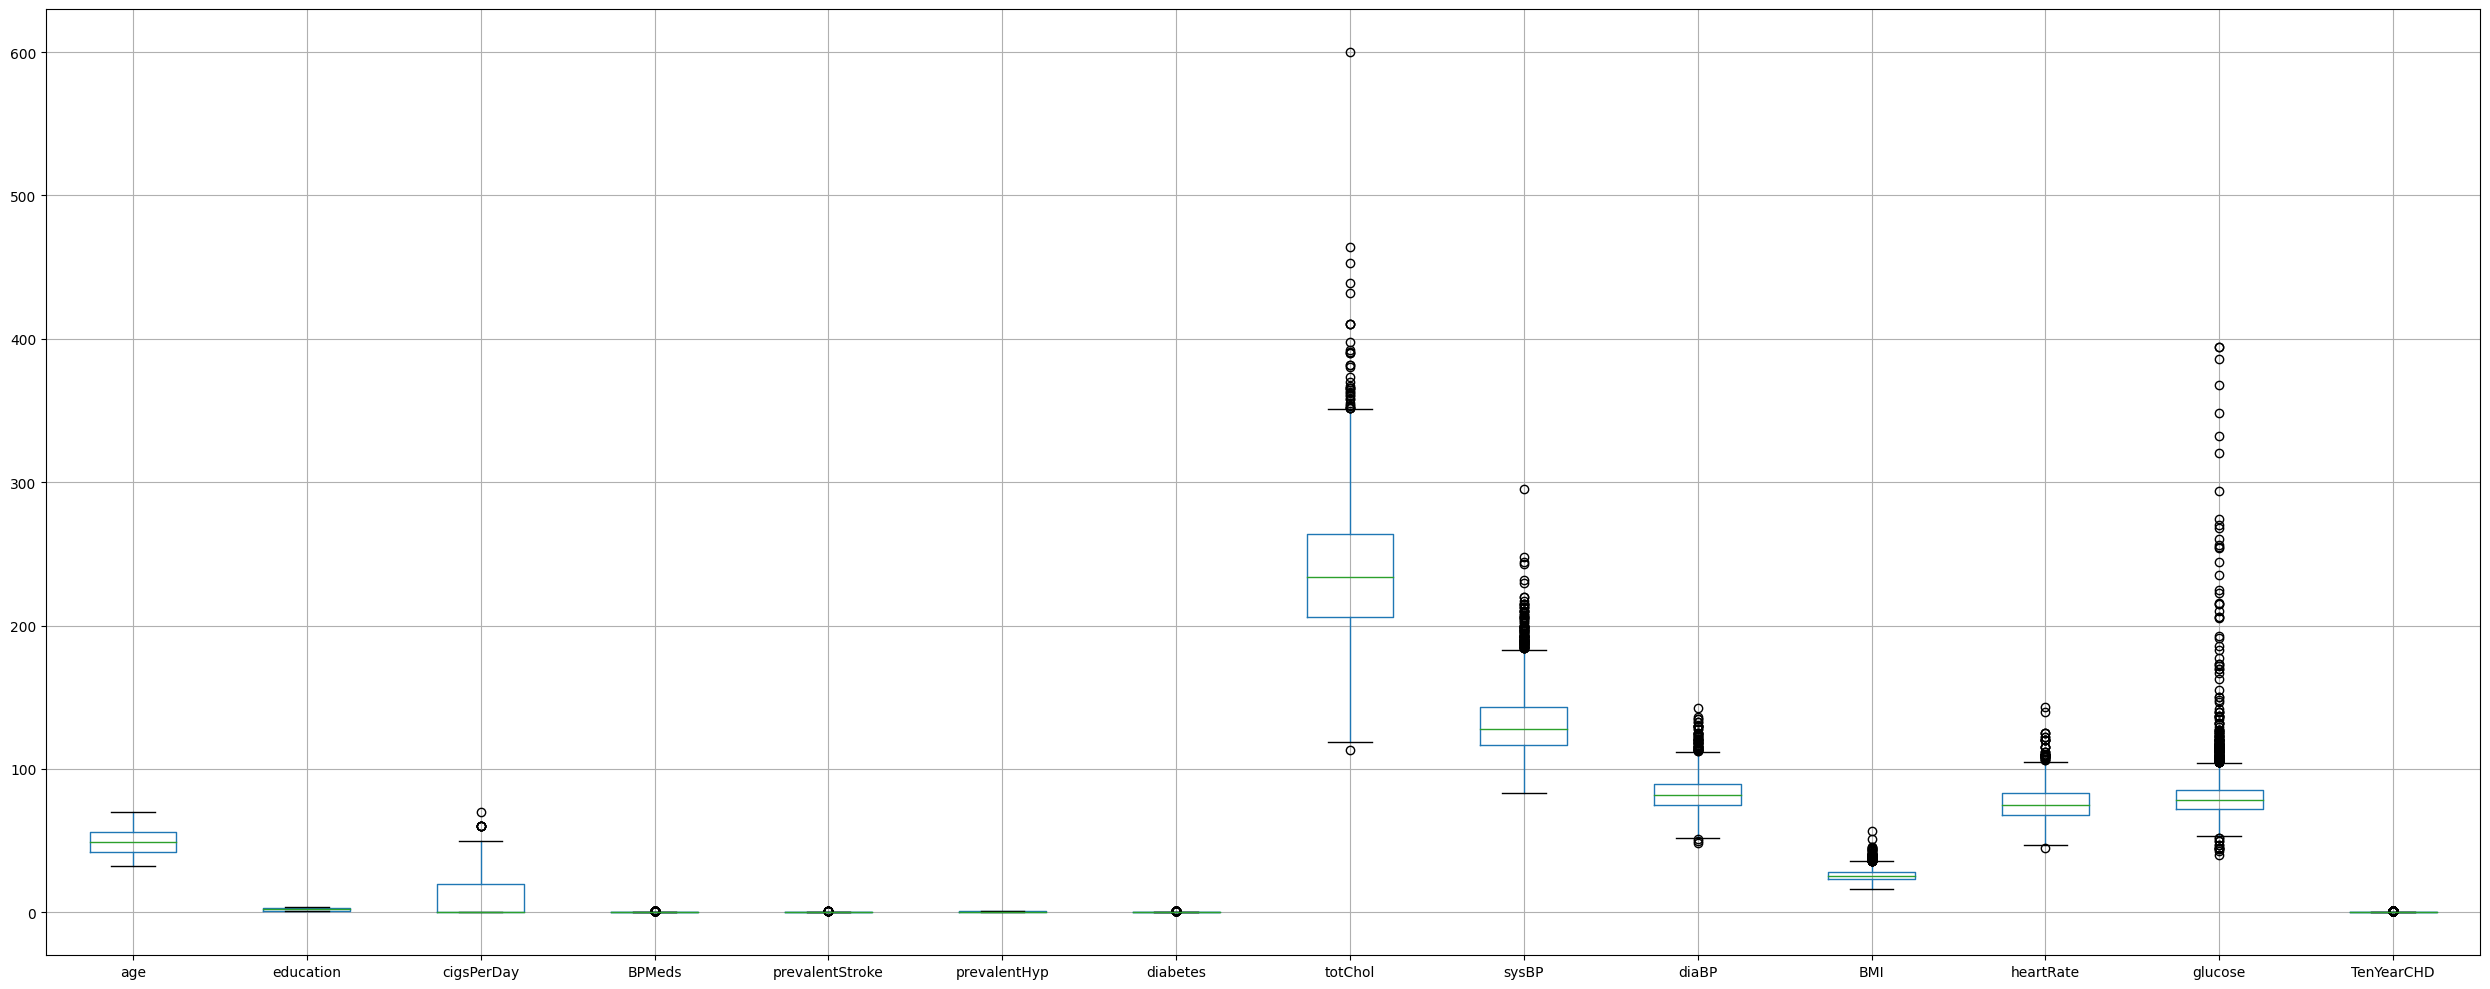

In [20]:
#Boxplot for detection of outliers.
plt.figure(figsize=(25,10))
cardio_data.boxplot()
plt.tight_layout()

There are outliers in this case which needs to be treated for proper statistical analysis.

In [27]:
# Treating the outliers
def clip_outliers(cardio_data):
    for column in cardio_data[numerical_variables]:
        # using IQR method to define range of upper and lower limit.
        q1 = cardio_data[column].quantile(0.25)
        q3 = cardio_data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        cardio_data[column] = cardio_data[column].clip(lower_bound, upper_bound)
    return cardio_data

Function clip_outliers was created and clipping method was used for removal of outliers.

In [28]:
cardio_data=clip_outliers(cardio_data)

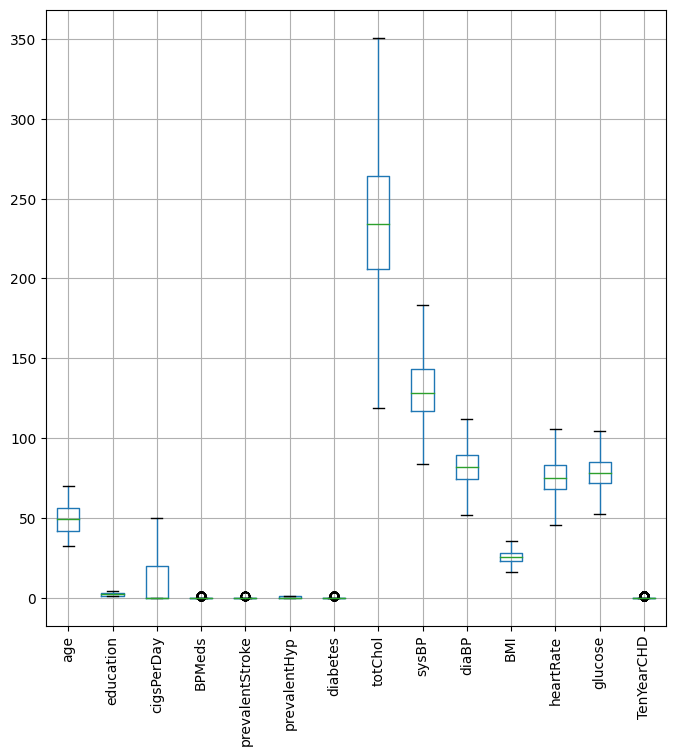

In [29]:
#Boxplot for outliers.
plt.figure(figsize=(8,8))
cardio_data.boxplot()
plt.xticks(rotation=90)
plt.show()

There are no outliers in the dataset so it is appropriate for further statistical analysis  

# **Correlation matrix for the dataset**

<Axes: >

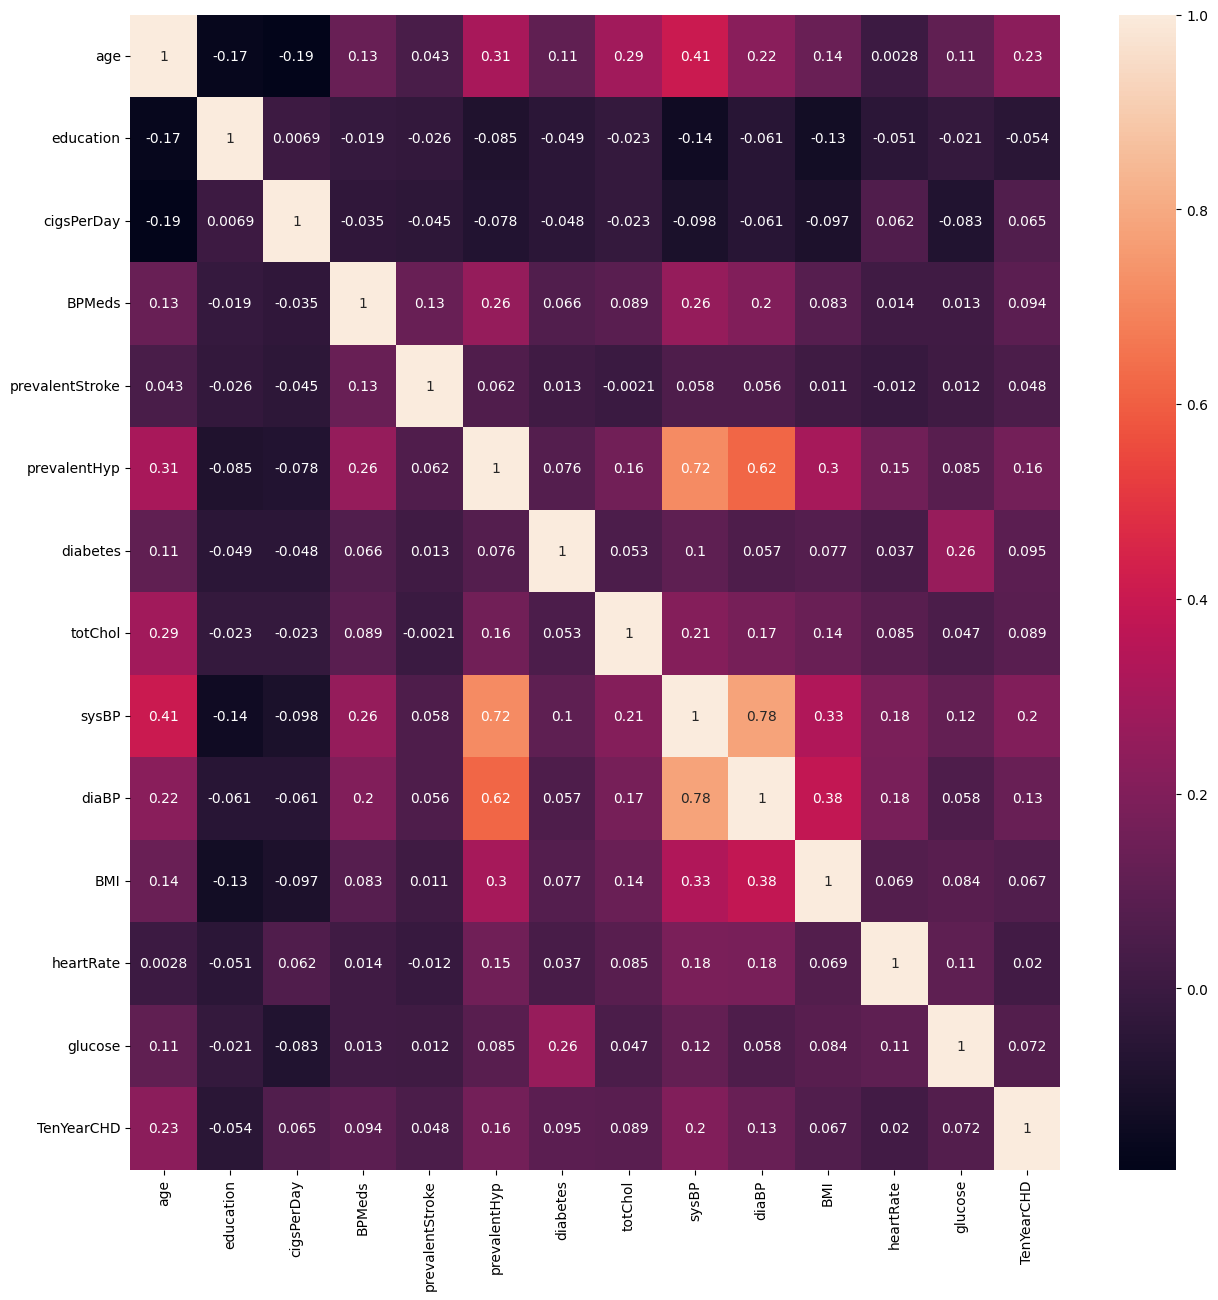

In [30]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(15,15))
correlation = cardio_data.corr()
sns.heatmap(correlation, annot=True)

It is found that dependent variable 'TenYearCHD' was found to have a positive correlation with all other independent variables

# **Exploratory data analysis**

### **Is male patients more prone to coronary heart disease ?**

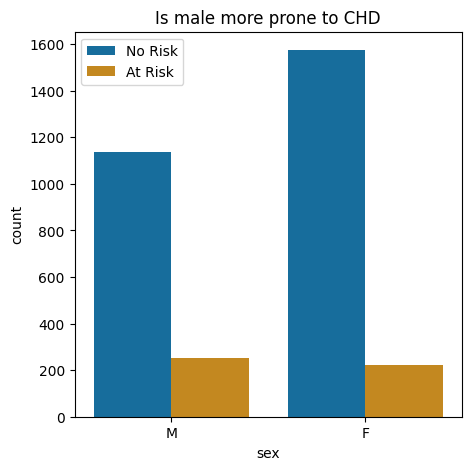

In [31]:
plt.figure(figsize = (5,5))
sns.countplot(x = cardio_data['sex'], hue = cardio_data['TenYearCHD'], palette = 'colorblind')
plt.title("Is male more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.xticks(rotation=0)
plt.show()

It can be concluded that females are having less risk of getting coronary heart disease.

### **Are people suffering from Diabetus more prone to Coronary heart disease ?**

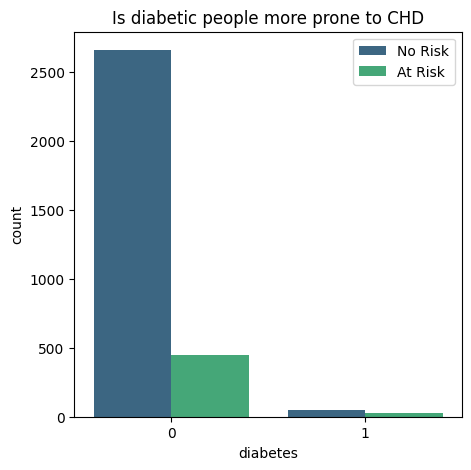

In [32]:
plt.figure(figsize = (5,5))
sns.countplot(x = cardio_data['diabetes'], hue = cardio_data['TenYearCHD'], palette = 'viridis')
plt.title("Is diabetic people more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

It can be concluded that healthy people are having lesser chances of getting the coronary heart diseases.

### **Do smokers have higher chances of getting  coronary heart disease ?**

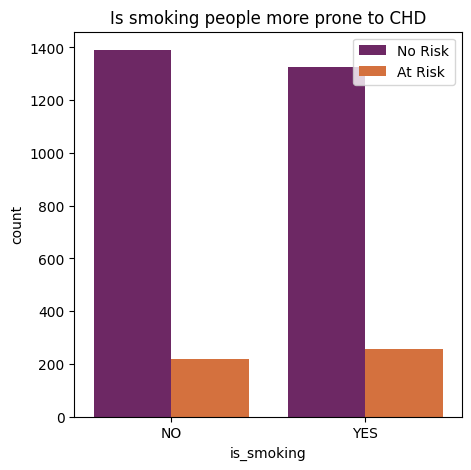

In [33]:
plt.figure(figsize = (5,5))
sns.countplot(x = cardio_data['is_smoking'], hue = cardio_data['TenYearCHD'], palette = 'inferno')
plt.title("Is smoking people more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

Smoking people are at higher risk of getting coronary heart disease compared to not smoking people.

### **Are Hypertensive people more likely to get Coronary heart diseases ?**

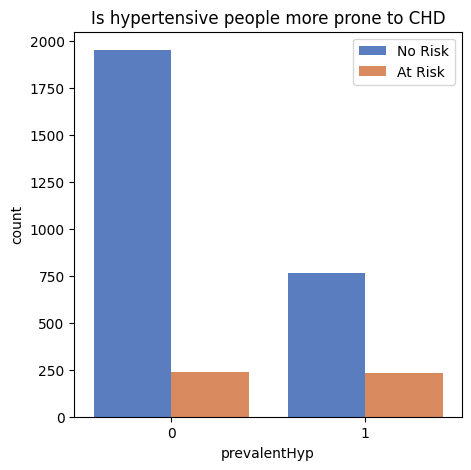

In [34]:
plt.figure(figsize = (5,5))
sns.countplot(x = cardio_data['prevalentHyp'], hue = cardio_data['TenYearCHD'], palette = 'muted')
plt.title("Is hypertensive people more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

It can be inferred that people with no hypertension are at lesser risk of getting coronary heart diseases.

### ***Are people on BP medication more likely to get Coronary heart diseases? ***

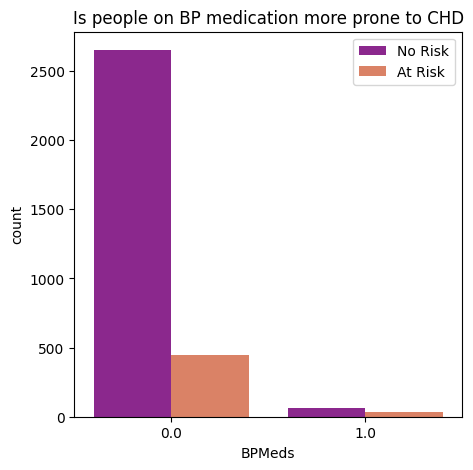

In [35]:
plt.figure(figsize = (5,5))
sns.countplot(x = cardio_data['BPMeds'], hue = cardio_data['TenYearCHD'], palette = 'plasma')
plt.title("Is people on BP medication more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

It can be concluded that patients with no BP medication are less prone to get coronary heart disease.

### **Which Age group is more vulnerable to Corona Heart diseases ?**

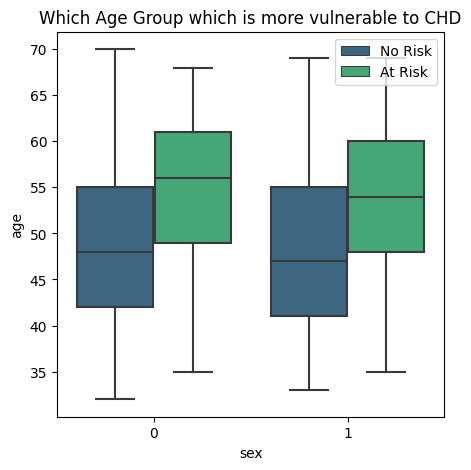

In [114]:
plt.figure(figsize = (5,5))
box_plot= sns.boxplot(x = cardio_data['sex'], y = cardio_data['age'], hue = cardio_data['TenYearCHD'], palette = 'viridis')
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = box_plot.get_legend_handles_labels()
box_plot.legend(handles, ['No Risk','At Risk'], loc="upper right")
plt.show()

Patients of age 50 to 60 are more prone to get the coronary heart diseases.

### **Whats the limit of cholestrol above which patients are likely to get Corona heart diseases ?**

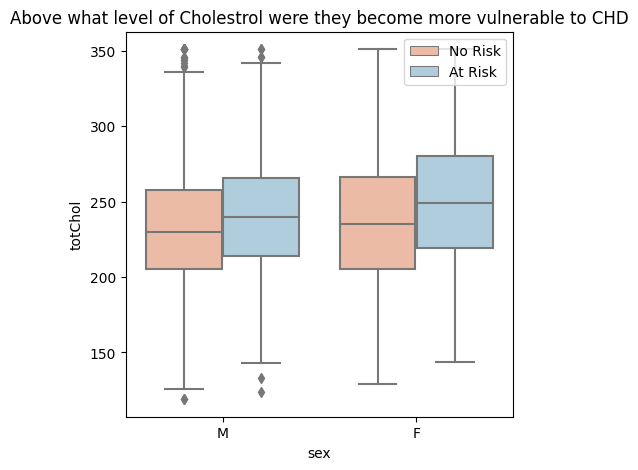

In [37]:
plt.figure(figsize = (5,5))
ax = sns.boxplot(x = cardio_data['sex'], y = cardio_data['totChol'], hue = cardio_data['TenYearCHD'], palette = 'RdBu')
plt.title("Above what level of Cholestrol were they become more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['No Risk','At Risk'], loc="upper right")
plt.show()

It can be concluded that patients with cholestrol ranging above 240 are more prone to get coronary heart diseases.

# **Handling categorical variables**

### **Categorising Heart Rate variable :**

In [117]:
def HeartRate_data(heartbeat):
    if heartbeat['heartRate'] <= 59:
        value = 'Low'
    elif heartbeat['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    return value

Function HeartRate_data was created and heartRate was categorised into Low, Normal and High depending on the value.

In [118]:
cardio_data['HeartRateLabel'] = cardio_data.apply(HeartRate_data, axis = 1)

In [119]:
cardio_data['HeartRateLabel'].value_counts()

Normal    2892
High       154
Low        143
Name: HeartRateLabel, dtype: int64

It can be inferred that there are 2892 with normal heartbeat, 154 people with high heartbeat and 143 patients with low heartbeat.

### **Which category of heartbeat are more prone to Coronary heart diseases?**

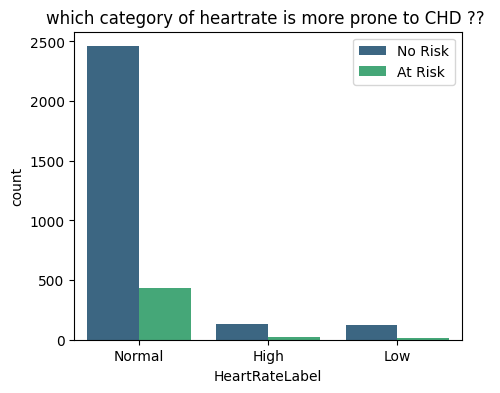

In [120]:
plt.figure(figsize = (5,4))
sns.countplot(x=cardio_data['HeartRateLabel'],hue=cardio_data['TenYearCHD'],palette='viridis')
plt.title("which category of heartrate is more prone to CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.xticks(rotation= 0)
plt.show()

Patients with normal heartbeat are at least risk of getting coronary heart diseases compared to high and low heart rate.

### **Does increased heart rate increases the incidence of coronary heart diseases ?**

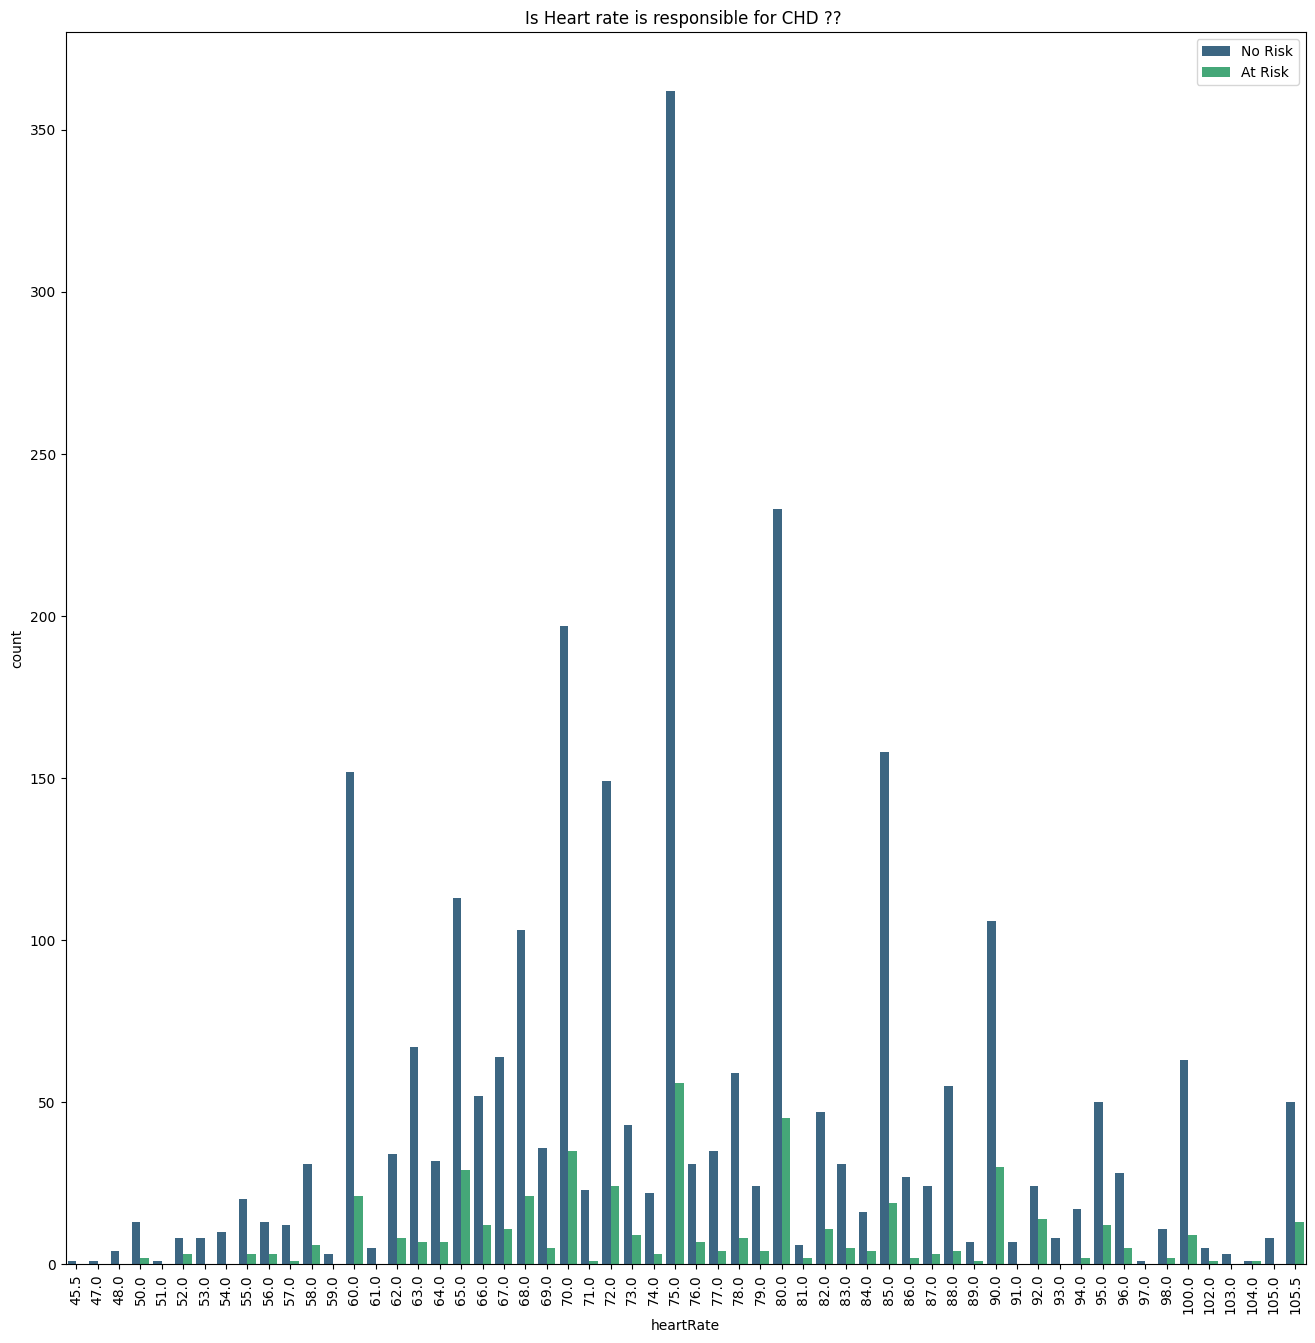

In [42]:
plt.figure(figsize = (16,16))
sns.countplot(x = cardio_data['heartRate'], hue = cardio_data['TenYearCHD'], palette = 'viridis')
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.xticks(rotation= 90)
plt.show()


It can be inferred that normal heartbeat patient were having least risk of getting coronary heart disease.

In [43]:
#Drop unneccessary variables
cardio_data.drop(['HeartRateLabel'], axis=1,inplace=True)

### **Is there any relation between Smoking cigarretes and incidence of coronary heart diseases ?**

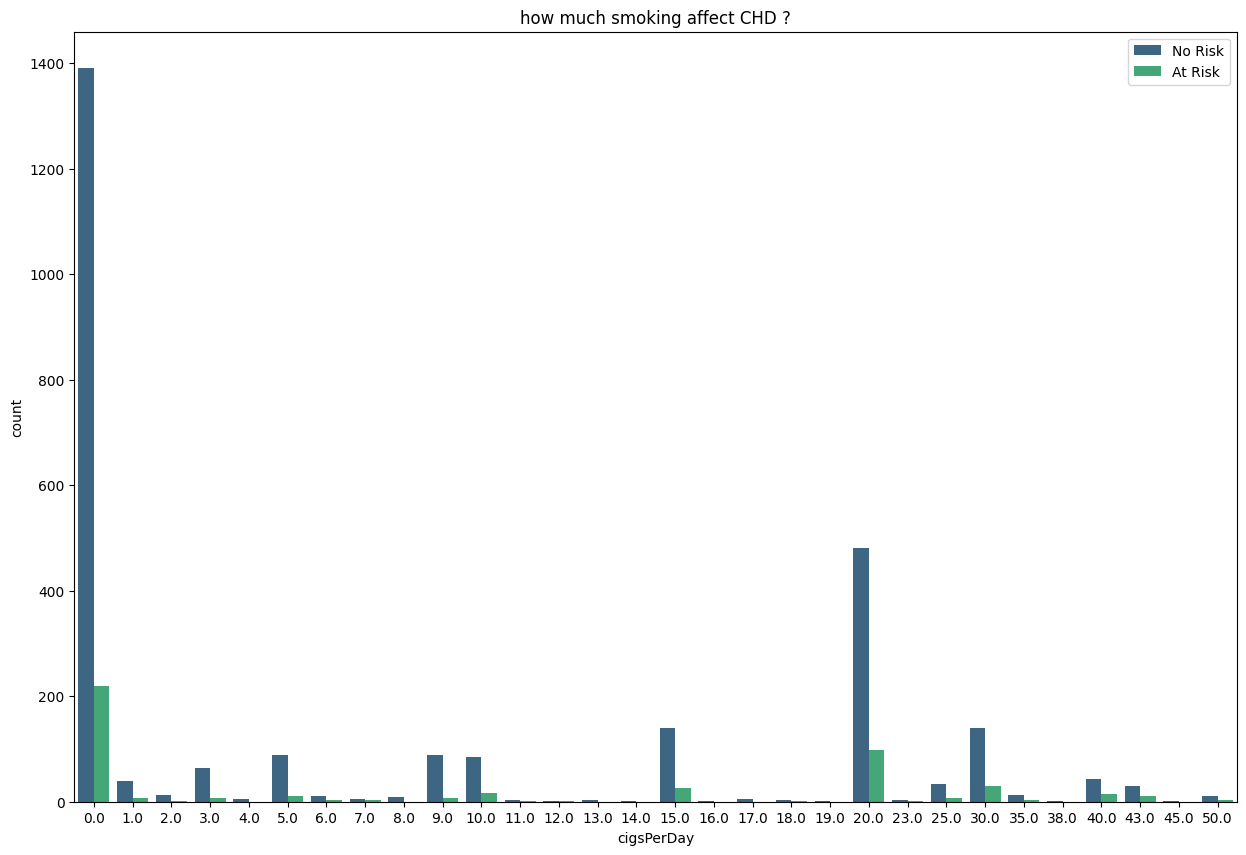

In [44]:
plt.figure(figsize = (15,10))
sns.countplot(x =cardio_data['cigsPerDay'], hue = cardio_data['TenYearCHD'], palette = 'viridis')
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()


People with no smoking habits were found to have least risk of getting coronary heart diseases.



### **Whether a person who had a stroke earlier more prone to coronary heart diseases?**

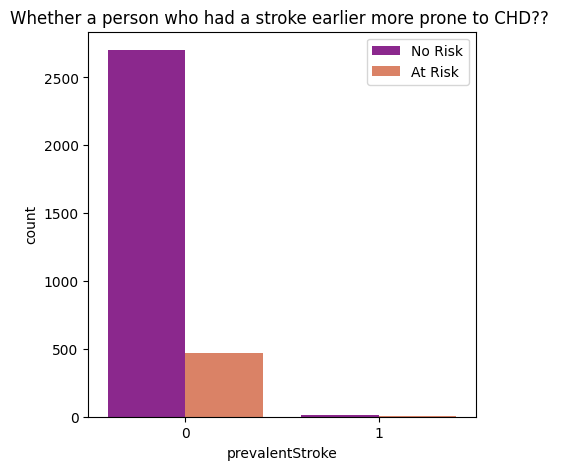

In [45]:
plt.figure(figsize = (5,5))
sns.countplot(x = cardio_data['prevalentStroke'], hue = cardio_data['TenYearCHD'], palette = 'plasma')
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

It can be concluded that patient with stroke earlier was found to have least risk of getting coronary heart diseases.

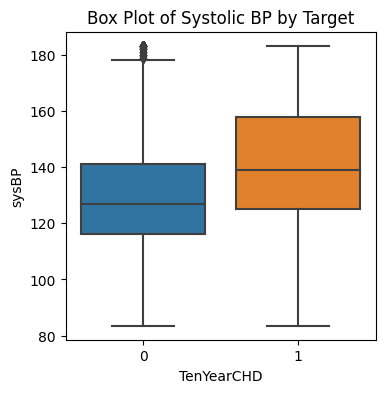

<Figure size 640x480 with 0 Axes>

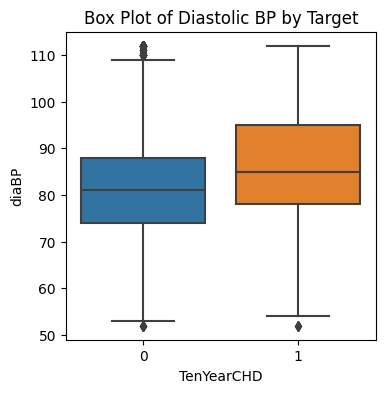

In [46]:
# Box plot
plt.figure(figsize=(4,4))
sns.boxplot(x=cardio_data['TenYearCHD'], y=cardio_data['sysBP'], data=cardio_data)
plt.title("Box Plot of Systolic BP by Target")
plt.show()
plt.tight_layout()
plt.figure(figsize=(4, 4))
sns.boxplot(x=cardio_data['TenYearCHD'], y=cardio_data['diaBP'], data=cardio_data)
plt.title("Box Plot of Diastolic BP by Target")
plt.show()

In [47]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII

It was evident that systolic and Diastolic blood pressure was highly correlated hence they were both combined and categorised using function blood_pressure_classification.

In [48]:
cardio_data['Hypertension'] = cardio_data.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
cardio_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,112.0,32.80,85.0,65.0,1,7


Hypertension variable was created in which value assigned by the function blood_pressure_classification was stored ranging from 0 to 7.

In [49]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

The glucose level was categorised into four categories namely, Normal, Prediabetic, Mild and Moderate.

In [50]:
cardio_data['diabetes'] = cardio_data['glucose'].apply(lambda x: diabetes_grade(x))
cardio_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
1,36,4.0,M,NO,0.0,0.0,0,1,1,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,46,1.0,F,YES,10.0,0.0,0,0,1,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50,1.0,M,YES,20.0,0.0,0,1,1,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64,1.0,F,YES,30.0,0.0,0,0,1,241.0,136.5,85.0,26.42,70.0,77.0,0,2
5,61,3.0,F,NO,0.0,0.0,0,1,1,272.0,182.0,112.0,32.80,85.0,65.0,1,7


diabetes variable was created in which value assigned by the function diabetes_grade was stored and further used for analysis.

In [51]:
cardio_data['SmokingFactor'] = cardio_data['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))
cardio_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,SmokingFactor
1,36,4.0,M,NO,0.0,0.0,0,1,1,212.0,168.0,98.0,29.77,72.0,75.0,0,5,0.000000
2,46,1.0,F,YES,10.0,0.0,0,0,1,250.0,116.0,71.0,20.35,88.0,94.0,0,1,2.302585
3,50,1.0,M,YES,20.0,0.0,0,1,1,233.0,158.0,88.0,28.26,68.0,94.0,1,3,2.995732
4,64,1.0,F,YES,30.0,0.0,0,0,1,241.0,136.5,85.0,26.42,70.0,77.0,0,2,3.401197
5,61,3.0,F,NO,0.0,0.0,0,1,1,272.0,182.0,112.0,32.80,85.0,65.0,1,7,0.000000


SmokingFactor variable was created in which logarithmic transformation was applied for the number of cigarretes.

In [52]:
cardio_data.drop(columns=['sysBP', 'diaBP', 'glucose','is_smoking'], inplace=True)


Drop the columns which are not neccessary any further as highly correlated variables are combined.

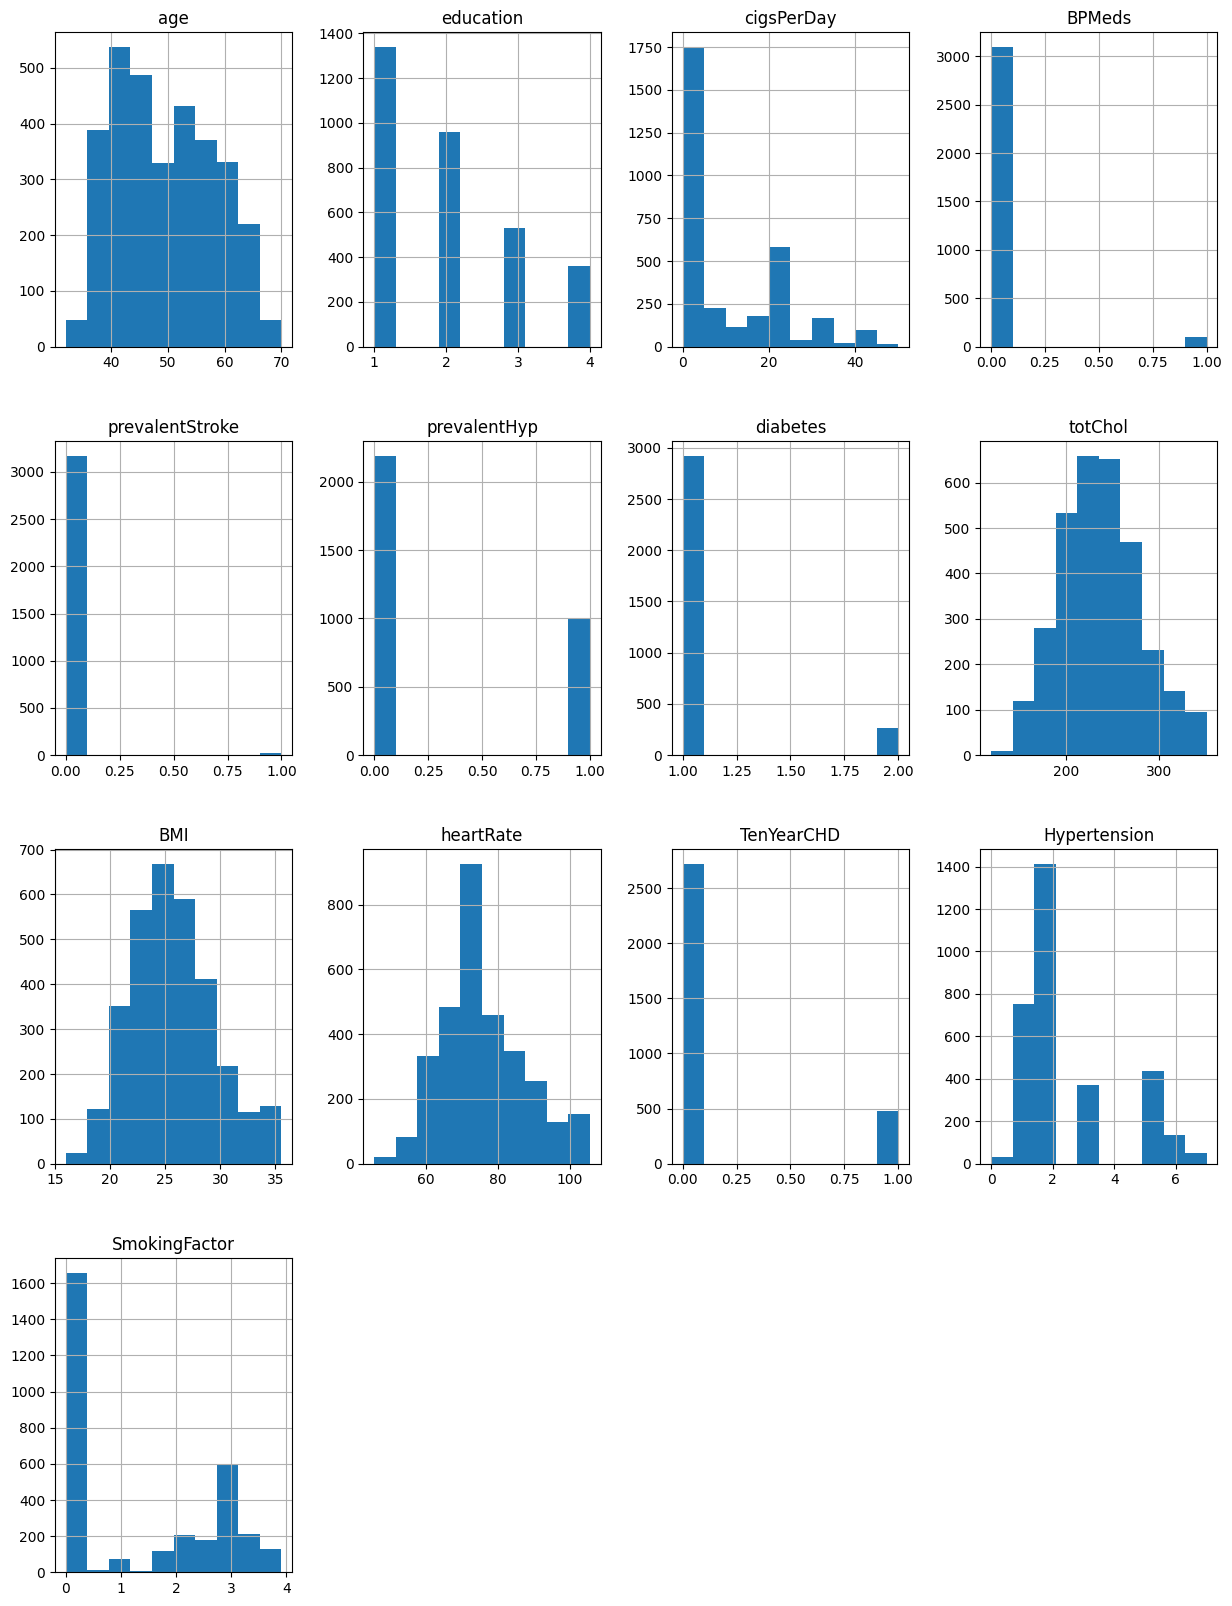

In [54]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cardio_data.hist(ax = ax)
plt.show()

It is evident from the above graphs that there is not much effect of BP medication and prevalance of strokes.

In [55]:
# remove not useful columns
cardio_data.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

Drop the irrevelant columns.

In [56]:
cardio_data['sex'] = cardio_data['sex'].apply(lambda x: 1 if x=='M' else 0)

Males are stored as 1 and females are stored as 0.

Final data is ready with columns- age, education, sex, cigsPerDay, prevalentHyp, diabetes, totChol, BMI, heartRate, TenYearCHD, Hypertension and SmokingFactor.

In [57]:
# Deciding on target variable and independent variables
label=cardio_data['TenYearCHD']
predictors=cardio_data.drop('TenYearCHD',axis=1)

TenYearCHD is stored as label or dependent variable whereas other variables except TenYearCHD are stored as predictors.

In [58]:
# Displays the topmost five rows of label column
label.head()

1    0
2    0
3    1
4    0
5    1
Name: TenYearCHD, dtype: int64

In [59]:
# Displays the topmpst five rows of predictors dataset
predictors.head()

,age,education,sex,cigsPerDay,prevalentHyp,diabetes,totChol,BMI,heartRate,Hypertension,SmokingFactor
1,36,4.0,1,0.0,1,1,212.0,29.77,72.0,5,0.000000
2,46,1.0,0,10.0,0,1,250.0,20.35,88.0,1,2.302585
3,50,1.0,1,20.0,1,1,233.0,28.26,68.0,3,2.995732
4,64,1.0,0,30.0,0,1,241.0,26.42,70.0,2,3.401197
5,61,3.0,0,0.0,1,1,272.0,32.80,85.0,7,0.000000


In [60]:
cardio_data['TenYearCHD'].value_counts()

0    2714
1     475
Name: TenYearCHD, dtype: int64

There is high imbalance in the target variable which needs to be treated with techniques such as SMOTE for proper statistical analysis

In [61]:
# Handling target class imbalance using SMOTE
from collections import Counter

In [62]:
print(f'Before Handling Imbalanced class {Counter(label)}')

# Resampling the minority class
smote = SMOTE(random_state=42)
# fit predictor and target variable
predictors, label = smote.fit_resample(predictors, label)
print(f'After Handling Imbalanced class {Counter(label)}')

Before Handling Imbalanced class Counter({0: 2714, 1: 475})
After Handling Imbalanced class Counter({0: 2714, 1: 2714})


SMOTE technique was used to handle the imbalanced class in the dataset.

In [63]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(predictors, label, test_size=0.2, random_state=20)

print(x_train.shape)
print(x_test.shape)

(4342, 11)
(1086, 11)


Dataset is divided into training dataset and testing dataset in the ratio 80:20.

In [64]:
# Scaling Data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Scaling of data is carried out to normalize the dataset.

# **k-NN Classifier**

In [65]:
neighbors=15
train_accuracy=np.empty(neighbors)
test_accuracy=np.empty(neighbors)

for i in range(1, neighbors+1):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_accuracy[i-1]= knn.score(x_train, y_train)
  test_accuracy[i-1]= knn.score(x_test, y_test)

Number of neighbors were set upto 15 and the model was fit and tested for i number of neighbor each time.

In [66]:
# Displays  the accuracy of the train and test dataset for every i number of neighbor.
print(f'Train accuracy : {train_accuracy} ')
print(f'Test accuracy : {test_accuracy} ')

Train accuracy : [1.         0.95048365 0.87632427 0.86711193 0.82957163 0.82473515
 0.79502533 0.80147398 0.78512206 0.78420083 0.77521879 0.77706126
 0.76416398 0.7646246  0.75541225] 
Test accuracy : [0.80662983 0.78360958 0.76427256 0.77532228 0.75322284 0.76427256
 0.74309392 0.75506446 0.73848987 0.74677716 0.7320442  0.73664825
 0.73112339 0.73020258 0.72744015] 


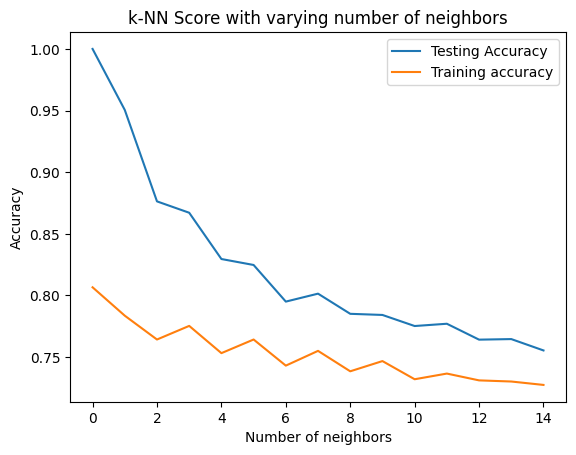

In [67]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(train_accuracy, label='Testing Accuracy')
plt.plot(test_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

It is evident that acccuacy is highest when number of neighbor is 1 and it gradually decreases as the number of neighbors is increased

In [68]:
# Get the predicted probabilities
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [69]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,y_train)
test_accuracy = accuracy_score(test_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7554122524182404
The accuracy on test data is  0.7274401473296501


In [70]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_pred))
print('Accuracy score:', accuracy_score(y_test,test_pred))
#Calculate precision score
precision = precision_score(y_test, test_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None
print("Precision Score:", precision)
# Print the classification report for train and test
print(classification_report(y_test, test_pred))

ROCAUC score: 0.7272594692858693
Accuracy score: 0.7274401473296501
Precision Score: 0.7363555536493851
              precision    recall  f1-score   support

           0       0.78      0.63      0.70       542
           1       0.69      0.83      0.75       544

    accuracy                           0.73      1086
   macro avg       0.74      0.73      0.72      1086
weighted avg       0.74      0.73      0.72      1086



ROCAUC score of 0.727 was obtained which infers that the model that good distinguishable ability. Accuracy of 0.727 was obtained by means of which it can be concluded that the model correctly predicts 72.7% instances. Precision of 0.736 was obtained which indicates the positive prediction rate.
However in case of medical diagnosis sensitivity is an important metric and in this case recall of 0.63 and 0.83 was obtained for class 0 and class 1 instances.

[[341 201]
 [ 95 449]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

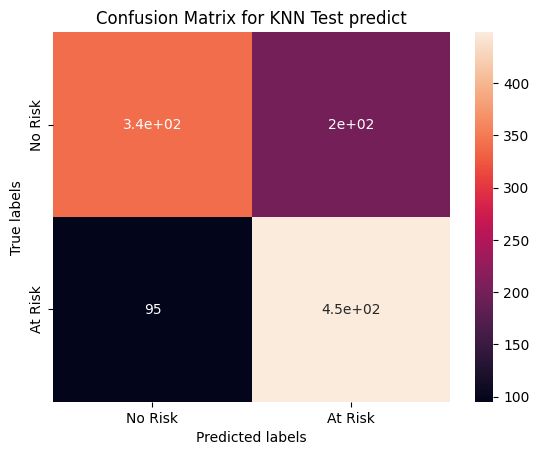

In [71]:
# Generate a confusion matrix
cm = confusion_matrix(y_test,test_pred)
# Get the confusion matrix for test data
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for KNN Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1427  745]
 [ 317 1853]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

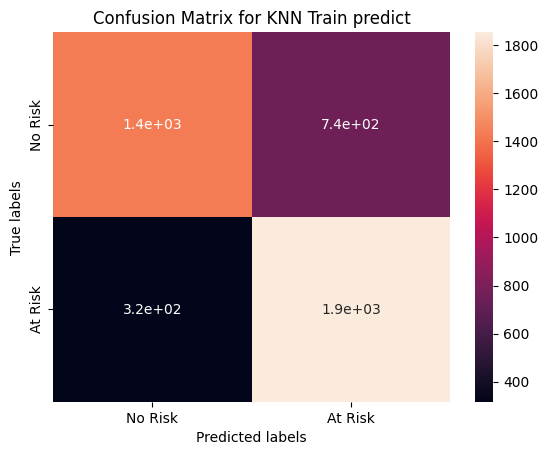

In [72]:
# Generate a confusion matrix
cm = confusion_matrix(y_train,train_pred)
# Get the confusion matrix for train data
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for KNN Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Indeed cross validation can be carried out to increase the accuracy of the model which is carried out out below.

In [73]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [74]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [75]:
knn_cv.best_score_

0.7858145121517925

In [76]:
knn_cv.best_params_


{'n_neighbors': 1}

In [77]:
knn_predict=knn_cv.predict(x_test)

In [78]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, knn_predict))
print('Accuracy score:', accuracy_score(y_test,knn_predict))
#Calculate precision score
precision = precision_score(y_test, knn_predict, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None
print("Precision Score:", precision)
# Print the classification report for train and test
print(classification_report(y_test, knn_predict))


ROCAUC score: 0.8064901237247666
Accuracy score: 0.8066298342541437
Precision Score: 0.8137347191407033
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       542
           1       0.77      0.88      0.82       544

    accuracy                           0.81      1086
   macro avg       0.81      0.81      0.81      1086
weighted avg       0.81      0.81      0.81      1086



ROCAUC score of 0.806 was obtained which is better compared to previous model and accuracy score of 0.806 was obtained with precision of 0.813. Cross validation turned out to increase the accuracy, precision and sensitivity of the model.

# **SVC Classifier**

In [79]:
# Create and fit an SVC classifier
svc = SVC(kernel='rbf', C=1.0)
svc.fit(x_train, y_train)

SVC()

In [80]:
# Predict on the test set
y_pred = svc.predict(x_test)

In [81]:
# Get the predicted probabilities
train_pred = svc.predict(x_train)
test_pred = svc.predict(x_test)

In [82]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,y_train)
test_accuracy = accuracy_score(test_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7544910179640718
The accuracy on test data is  0.7154696132596685


In [83]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_pred))
print('Accuracy score:', accuracy_score(y_test,test_pred))
#Calculate precision score
precision = precision_score(y_test, test_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None
print("Precision Score:", precision)
# Print the classification report for train and test
print(classification_report(y_test, test_pred))

ROCAUC score: 0.715344855654439
Accuracy score: 0.7154696132596685
Precision Score: 0.7193658539276946
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       542
           1       0.69      0.78      0.73       544

    accuracy                           0.72      1086
   macro avg       0.72      0.72      0.71      1086
weighted avg       0.72      0.72      0.71      1086



ROCAUC score of 0.715 was obtained with an accuracy of 0.715 and precision score of 0.719. The model worked well for both training and testing dataset. Sensitivity of 0.65 and 0.78 was obtained for class 0 and class 1 instances respectively.

[[351 191]
 [118 426]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

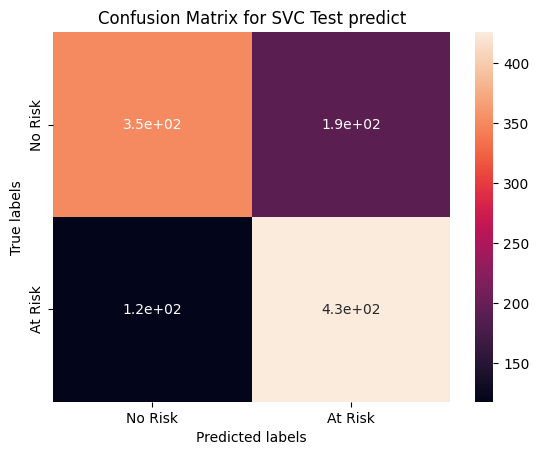

In [84]:
# Generate a confusion matrix
cm = confusion_matrix(y_test,test_pred)
# Get the confusion matrix for test data
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for SVC Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


[[1486  686]
 [ 380 1790]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

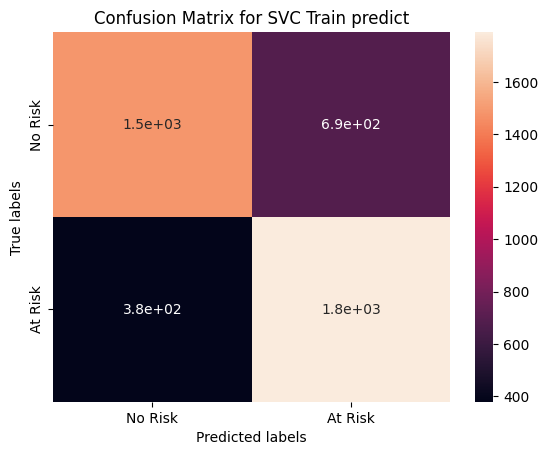

In [85]:
# Generate a confusion matrix
cm = confusion_matrix(y_train,train_pred)
# Get the confusion matrix for train data
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for SVC Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Logistic Regression**

In [86]:
# create and train logistic regression model
logit = LogisticRegression(fit_intercept=True, max_iter=10000)
logit.fit(x_train, y_train)


LogisticRegression(max_iter=10000)

In [87]:
# Get the model coefficients
logit.coef_

array([[ 0.73860504, -0.08056067, -0.2235172 ,  0.29245651, -0.26719943,
        -0.21809937,  0.13658915,  0.1622875 , -0.03426468,  0.2036176 ,
         0.15014817]])

In [88]:
# Get the predicted probabilities
train_pred = logit.predict(x_train)
test_pred = logit.predict(x_test)

In [89]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,y_train)
test_accuracy = accuracy_score(test_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6672040534315984
The accuracy on test data is  0.6574585635359116


In [90]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_pred))
print('Accuracy score:', accuracy_score(y_test,test_pred))
#Calculate precision score
precision = precision_score(y_test, test_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None
print("Precision Score:", precision)
# Print the classification report for train and test
print(classification_report(y_test, test_pred))

ROCAUC score: 0.6574200944215324
Accuracy score: 0.6574585635359116
Precision Score: 0.6576918947167663
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       542
           1       0.65      0.68      0.66       544

    accuracy                           0.66      1086
   macro avg       0.66      0.66      0.66      1086
weighted avg       0.66      0.66      0.66      1086



In this case, ROCAUC score of 0.657 was obtained with an accuracy score of 0.657 and precision score of 0.657 respectively. The metrics indicate that model does not work out well as they are less in accuracy, precision and sensitivity. Also, recall turned out to be less with value of 0.66 and 0.65 for class 0 and class 1 instances.

[[351 191]
 [118 426]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

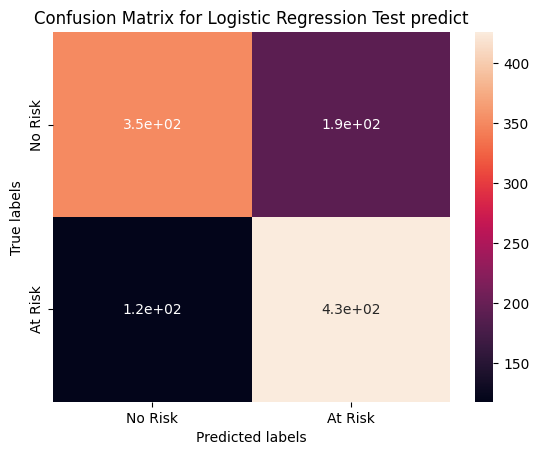

In [91]:
# Get the confusion matrix for train
cm = confusion_matrix(y_test, y_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1426  746]
 [ 699 1471]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

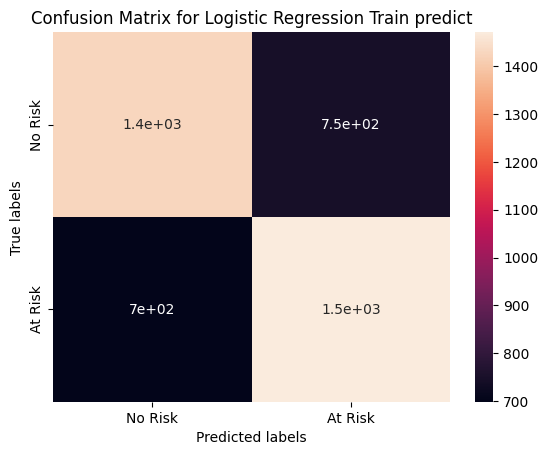

In [92]:
# Get the confusion matrix for train
cm = confusion_matrix(y_train, train_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree Classifier**

In [124]:
decision_tree = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [94]:
train_pred = decision_tree.predict(x_train)
test_pred = decision_tree.predict(x_test)

In [95]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,y_train)
test_accuracy = accuracy_score(test_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8028558268079227
The accuracy on test data is  0.7937384898710865


In [96]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_pred))
print('Accuracy score:', accuracy_score(y_test,test_pred))
#Calculate precision score
precision = precision_score(y_test, test_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None
print("Precision Score:", precision)
# Print the classification report for train and test
print(classification_report(y_test, test_pred))

ROCAUC score: 0.7937852724115477
Accuracy score: 0.7937384898710865
Precision Score: 0.7945411088644992
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       542
           1       0.81      0.77      0.79       544

    accuracy                           0.79      1086
   macro avg       0.79      0.79      0.79      1086
weighted avg       0.79      0.79      0.79      1086



For decision tree classifier, ROCAUC score of 0.793 was obtained. The accuracy and precision score of the model turned out to be 0.793 and 0.794 respectively. The recall score for class 0 and class 1 instances turned out to be 0.82 and 0.77 which means that it is able to identify the positive cases correctly and better compared to previous algorithms.

[[351 191]
 [118 426]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

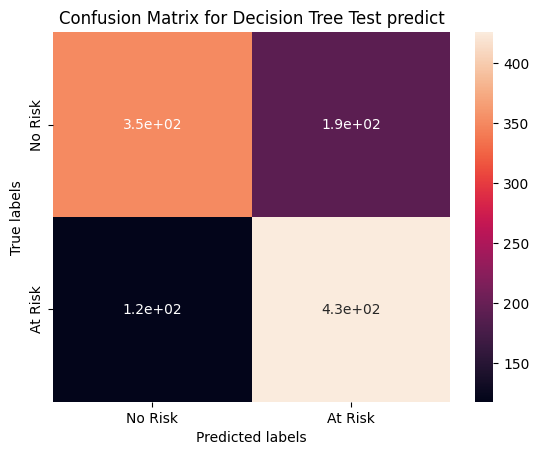

In [97]:
# Get the confusion matrix for train
cm = confusion_matrix(y_test, y_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1785  387]
 [ 469 1701]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

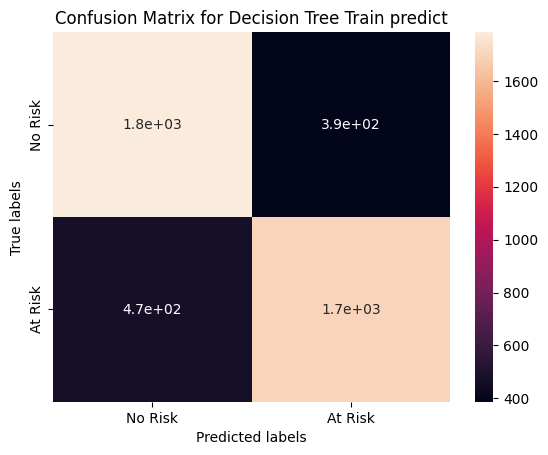

<Figure size 400x400 with 0 Axes>

In [98]:
# Get the confusion matrix for train
cm = confusion_matrix(y_train, train_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Random Forest Classifier**

In [99]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [100]:
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [101]:
train_pred =  classifier.predict(x_train)
test_pred  = classifier.predict(x_test)

In [102]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,y_train)
test_accuracy = accuracy_score(test_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9965453707968678
The accuracy on test data is  0.8848987108655617


In [103]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_pred))
print('Accuracy score:', accuracy_score(y_test,test_pred))
#Calculate precision score
precision = precision_score(y_test, test_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None
print("Precision Score:", precision)
# Print the classification report for train and test
print(classification_report(y_test, test_pred))

ROCAUC score: 0.8849373236379423
Accuracy score: 0.8848987108655617
Precision Score: 0.8855994013270567
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       542
           1       0.90      0.86      0.88       544

    accuracy                           0.88      1086
   macro avg       0.89      0.88      0.88      1086
weighted avg       0.89      0.88      0.88      1086



For random forest classifier, ROCAUC score, accuracy score and precision score obtained were 0.884, 0.884 and 0.885 respectively. However the recall values for class 0 and class 1 instances were 0.91 and  0.86 respectively which means it is able to identify diseased instances and healthy instances in 91% and 86% cases correctly.

[[351 191]
 [118 426]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

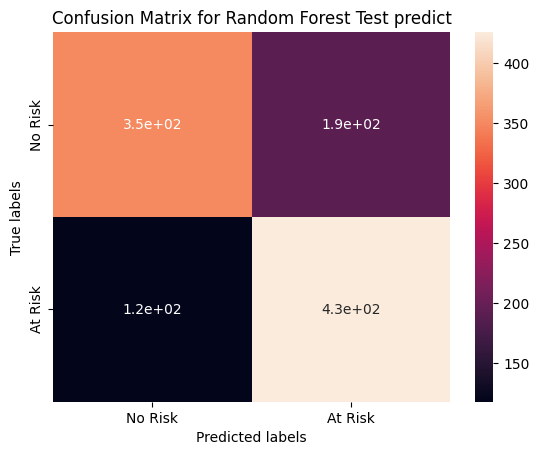

In [104]:
# Get the confusion matrix for train
cm = confusion_matrix(y_test, y_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2163    9]
 [   6 2164]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

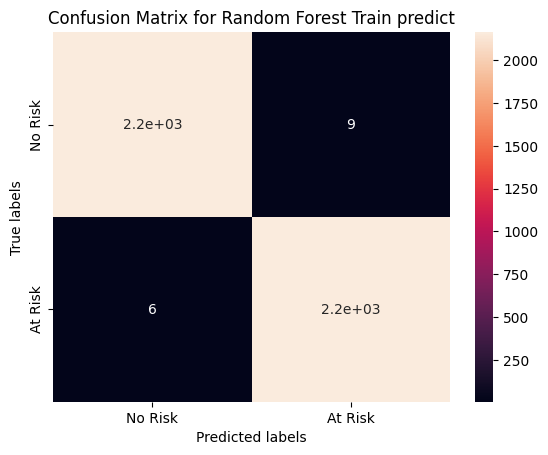

<Figure size 400x400 with 0 Axes>

In [105]:
# Get the confusion matrix for train
cm = confusion_matrix(y_train, train_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Gradient Boost Classifier**

In [106]:
gb_classifier = GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [107]:
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [108]:
train_pred =  gb_classifier.predict(x_train)
test_pred  = gb_classifier.predict(x_test)

In [109]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,y_train)
test_accuracy = accuracy_score(test_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.866421004145555
The accuracy on test data is  0.8425414364640884


In [110]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_pred))
print('Accuracy score:', accuracy_score(y_test,test_pred))
#Calculate precision score
precision = precision_score(y_test, test_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None
print("Precision Score:", precision)
# Print the classification report for train and test
print(classification_report(y_test, test_pred))

ROCAUC score: 0.8426748697634036
Accuracy score: 0.8425414364640884
Precision Score: 0.8499877694043398
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       542
           1       0.90      0.77      0.83       544

    accuracy                           0.84      1086
   macro avg       0.85      0.84      0.84      1086
weighted avg       0.85      0.84      0.84      1086



For Gradient boost classifier, ROCAUC score, accuracy score and precision score obtained were 0.842, 0.842 and 0.849 respectively. Recall values for claas 0 and class 1 instances turned out to be 0.82 and 0.77 respectively.

[[351 191]
 [118 426]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

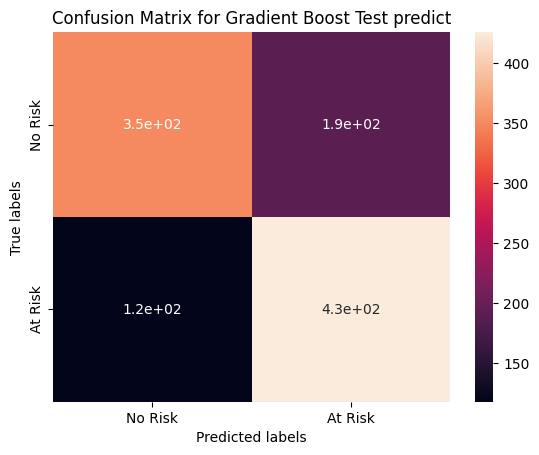

In [111]:
# Get the confusion matrix for train
cm = confusion_matrix(y_test, y_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boost Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2014  158]
 [ 422 1748]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

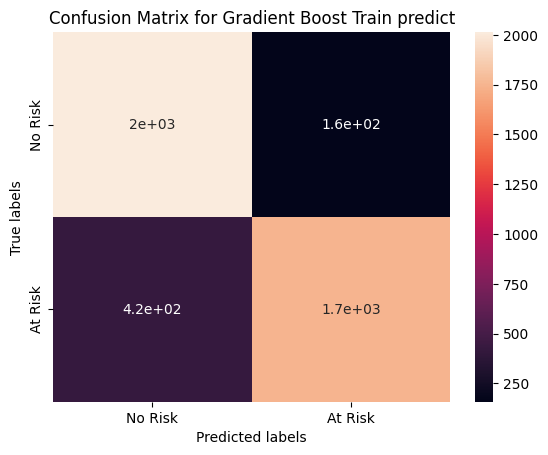

<Figure size 400x400 with 0 Axes>

In [112]:
# Get the confusion matrix for train
cm = confusion_matrix(y_train, train_pred)
labels = ['No Risk', 'At Risk']
print(cm)
ax= plt.subplot()
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Conclusion**

It is very much essential for the prediction of coronary heart diseases after the fatal results and deaths due to this disease. It is possible to reduce the deaths caused due to this coronary haert diseases by early diagnosis and taking precautionary measures against the occurance of this diseases. For medical diagnosis, recall turn to be an important metric which tells the number of patients which are having diseased and are correctly predicted. It is ok if the healthy person is classified as diseased person but it is not ok for a model to classify the diseased person as healthy person. Also, random forest classifier and gradient boost classifier worked well for the dataset with high accuracy scorea and high recall values. If a model is having hifh recall values , then there is least chances of the model for incorrectly classifying a diseased person as a healthy person. Future line of work includes several strategies to improve the model recall score, enabling us to decrease the mortality rate due to coronary heart diseases by proper preventive measures.